In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# display settings

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)
pd.set_option("display.float_format","{:.2f}".format)
sns.set_style("whitegrid")

In [6]:
# load data

data = pd.read_csv(r"C:\Data science work\Projects\SupplyChain Analytics Project\Data\supplychain_cleaned_data.csv")
data.head() 

,Order Id,order date (DateOrders),Shipping Mode,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Sales per customer,Benefit per order,Order City,Order Country,Category Name,Product Name,Delay days,profit_status,order_year,order_month,order_day
0,77202,2018-01-31 22:56:00,Standard Class,3,4,Advance shipping,0,314.64,91.25,Bekasi,Indonesia,Sporting Goods,Smart watch,-1,Profit,2018,1,31
1,75939,2018-01-13 12:27:00,Standard Class,5,4,Late delivery,1,311.36,-249.09,Bikaner,India,Sporting Goods,Smart watch,1,Loss,2018,1,13
2,75938,2018-01-13 12:06:00,Standard Class,4,4,Shipping on time,0,309.72,-247.78,Bikaner,India,Sporting Goods,Smart watch,0,Loss,2018,1,13
3,75937,2018-01-13 11:45:00,Standard Class,3,4,Advance shipping,0,304.81,22.86,Townsville,Australia,Sporting Goods,Smart watch,-1,Profit,2018,1,13
4,75936,2018-01-13 11:24:00,Standard Class,2,4,Advance shipping,0,298.25,134.21,Townsville,Australia,Sporting Goods,Smart watch,-2,Profit,2018,1,13


Order count = demand proxy

This is standard in supply chain analytics 
⬇️

In [8]:
# Create Monthly Demand
# How does demand change over time? 

monthly_demand =(
     data.groupby(["order_year", "order_month"])
     .size()
     .reset_index(name = "Total_orders")
)

monthly_demand.head()


,order_year,order_month,Total_orders
0,2015,1,5322
1,2015,2,4729
2,2015,3,5362
3,2015,4,5126
4,2015,5,5357


Why?

Forecasting needs a time axis

Clean monthly timeline 
⬇️

In [9]:
# Create Proper Date Column

monthly_demand["order date (DateOrders)"] = pd.to_datetime(
    monthly_demand["order_year"].astype(str) + "-" +
    monthly_demand["order_month"].astype(str) + "-01"
)

monthly_demand = monthly_demand.sort_values("order date (DateOrders)")
monthly_demand.head()

,order_year,order_month,Total_orders,order date (DateOrders)
0,2015,1,5322,2015-01-01
1,2015,2,4729,2015-02-01
2,2015,3,5362,2015-03-01
3,2015,4,5126,2015-04-01
4,2015,5,5357,2015-05-01


📊 Visualize Demand Trend over time

Growth or decline

Seasonality

Demand spikes

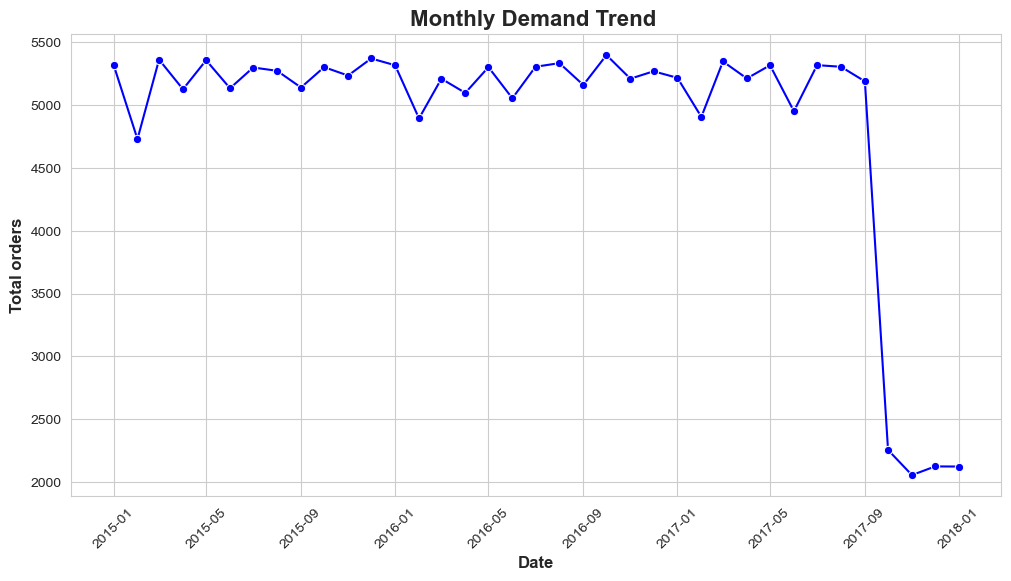

In [10]:

plt.figure(figsize = (12,6))
sns.lineplot(data = monthly_demand,
              x = "order date (DateOrders)",
              y = "Total_orders",
              marker = "o",
              color = "blue"
              )

plt.title("Monthly Demand Trend ", fontsize = 16, weight = "bold")
plt.xticks(rotation = 45)
plt.xlabel("Date", fontsize = 12 , weight = "bold"  )
plt.ylabel("Total orders", fontsize = 12 , weight = "bold")
plt.show()

Conclusion: ⬆️
Monthly demand remained stable across most periods with minor seasonal fluctuations. The apparent decline at the end of the timeline is attributed to incomplete data and does not indicate a true decrease in demand.

Smooths noise

Shows short-term vs medium-term trend 
⬇️

In [11]:
#Simple Moving Average Forecast

monthly_demand["MA_3"] = monthly_demand["Total_orders"].rolling(3).mean() # 3 months moving average
monthly_demand["MA_6"] = monthly_demand["Total_orders"].rolling(6).mean() # 6 months moving average

📊 Visualize Forecast Trend 
⬇️

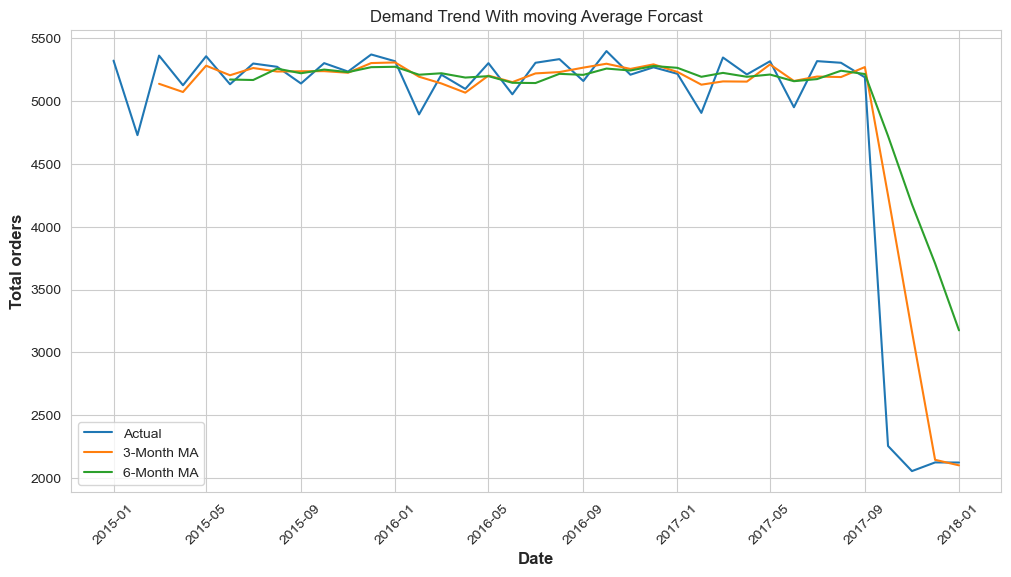

In [12]:
plt.figure(figsize=(12,6))

plt.plot(monthly_demand["order date (DateOrders)"], monthly_demand["Total_orders"], label="Actual")

plt.plot(monthly_demand["order date (DateOrders)"],monthly_demand["MA_3"] , label="3-Month MA"  ) 

plt.plot(monthly_demand["order date (DateOrders)"], monthly_demand["MA_6"], label="6-Month MA" )

plt.legend()
plt.xticks(rotation = 45)
plt.xlabel("Date", fontsize = 12 , weight = "bold")
plt.ylabel("Total orders",fontsize = 12 , weight = "bold")
plt.title("Demand Trend With moving Average Forcast")
plt.show()

In [13]:
# Save Forecast Data

monthly_demand.to_csv(r"C:\Data science work\Projects\SupplyChain Analytics Project\Data\monthly_demand_forecast.csv", index=False)